<a href="https://colab.research.google.com/github/worldwidekatie/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 names=['party', 'handicapped-infants', 'water-project', 
                        'budget', 'physician-fee-freeze', 'el-salvador-aid', 
                        'religious-groups', 'anti-satellite-ban', 
                        'aid-to-contras', 'mx-missile', 'immigration', 
                        'synfuels', 'education', 'right-to-sue', 
                        'crime', 'duty-free', 'south-africa'])

df.head()


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [2]:
import numpy as np
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


### 1. Generate and numerically represent a confidence interval

In [3]:
#Get my dataset
df1 = df['budget']

print(df1.describe())

np.mean(df1)

count    424.000000
mean       0.596698
std        0.491140
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: budget, dtype: float64


0.5966981132075472

In [4]:
df1 = df1.dropna()

df1.describe()

count    424.000000
mean       0.596698
std        0.491140
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: budget, dtype: float64

In [0]:
from scipy import stats

#Make a function to make the confidence interval
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  #Because we're using numpy and want the sample not the population
  s = data.std(ddof=1)  
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error )


In [6]:
mean, lower, upper = confidence_interval(df1)

print(mean)
print(lower)
print(upper)

0.5966981132075472
0.5498151808536169
0.6435810455614774


In [7]:
margin_of_error = upper - mean

margin_of_error

0.04688293235393026

### 2. Graphically (with a plot) represent the confidence interval

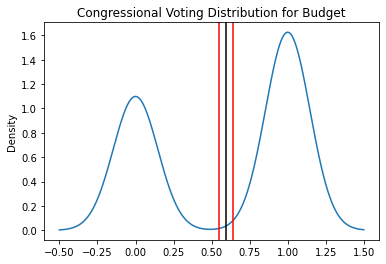

In [8]:
import matplotlib.pyplot as plt

CI= confidence_interval(df1)

df1.plot.density()
plt.title("Congressional Voting Distribution for Budget")
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red')
plt.show()

### 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

The probability a member of congress votes yes on the budget is 59.67% plus or minus 4.69%.

Mean:0.5967
MOE:(+/-)0.0469 

#Chi^2

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data **by hand using NumPy**

##Research Question: Is there a relationship between a person's gender and income?

Null Hypothesis: gender and income are independent.
Alternative Hypothesis: gender and income are dependent
Confidence level: 95%

In [9]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", na_values=" ?", 
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [11]:
import pandas as pd
observed_frequencies = pd.crosstab(df['sex'], df['income'], margins=True)

observed_frequencies

income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [20]:
observed = pd.crosstab(df['sex'], df['income'])

observed = observed.values

observed

array([[ 9592,  1179],
       [15128,  6662]])

In [14]:
row_sums = observed_frequencies.iloc[0:2, 2:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [15]:
col_sums = observed_frequencies.iloc[2:, 0:2].values
col_sums = col_sums[0]

col_sums

array([24720,  7841])

In [16]:
#sample size
total_total =df.shape[0]

total_total

32561

In [17]:
#To get the expected values for the contingency table
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [18]:
chi2 = ((observed-expected)**2 / expected).sum()

chi2

1518.8868199570722

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data **in a single line using scipy**

In [21]:
from scipy import stats
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

1517.813409134445
0.0
1
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


###Conclusion
Based on a chi^2 of 1517.81 and a p-value of ~0.0, we reject the null hypothesis that sex and income are independent and instead offer an alternative hypothesis that the two are related.

#Stretch Goal:
Apply techniques you learned today to your project data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Pew Exploratory - Sheet1 (1).csv to Pew Exploratory - Sheet1 (1).csv


In [0]:
import pandas as pd
pewdf = pd.read_csv('Pew Exploratory - Sheet1 (1).csv')

pewdf.head()

,Other,Tool,Economic,Connection,Info,Spanish,age
0,NaN,NaN,NaN,1.0,1.0,Spanish,62
1,NaN,NaN,NaN,NaN,1.0,Spanish,58
2,NaN,1.0,NaN,NaN,NaN,Spanish,40
3,NaN,NaN,1.0,NaN,NaN,Spanish,38
4,NaN,NaN,NaN,NaN,1.0,Spanish,40


In [0]:
import numpy as np
pewdf = pewdf.replace({np.NaN: 0})

pewdf.describe()

,Other,Tool,Economic,Connection,Info,age
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,0.093797,0.073374,0.045386,0.299546,0.633132,49.825265
std,0.291657,0.260848,0.208228,0.458233,0.482133,19.226028
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,51.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,65.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


In [0]:
import pandas as pd
observed_frequencies = pd.crosstab(pewdf['Spanish'], pewdf['Economic'])

observed_frequencies

Economic,0.0,1.0
Spanish,,
English,1188,49
Spanish,74,11


In [0]:
observed = pd.crosstab(pewdf['Spanish'], pewdf['Economic'])

observed = observed.values

observed

array([[1188,   49],
       [  74,   11]])

In [0]:
from scipy import stats
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

12.803248616976674
0.00034601798537847505
1
[[1180.85779123   56.14220877]
 [  81.14220877    3.85779123]]


Conclusion: Due to a chi-squared statistic of 12.8 and a p-value of 0.00035, I reject the null hypothesis that preferred language and reporting of economic themes are indepedent and instead offer an alternative hypothesis, that they are dependent.

In [0]:
import pandas as pd
observed_frequencies = pd.crosstab(pewdf['Spanish'], pewdf['Info'])

observed_frequencies

Info,0.0,1.0
Spanish,,
English,438,799
Spanish,47,38


In [0]:
observed = pd.crosstab(pewdf['Spanish'], pewdf['Info'])

observed = observed.values

observed

array([[438, 799],
       [ 47,  38]])

In [0]:
from scipy import stats
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

12.698133758941724
0.00036602068645769933
1
[[453.81618759 783.18381241]
 [ 31.18381241  53.81618759]]


### Now I'm gonna try t-tests on this same data.

In [0]:
Spanish = pewdf[pewdf['Spanish']=='Spanish']
English = pewdf[pewdf['Spanish']=='English']

In [0]:
#My Function used to make an awesome new dataframe of everything relevant!
import pandas as pd

def Ttest_loop(df1, df2):
  issues = df1.columns.tolist()
  issues.remove('Spanish')
  output=[]

  for issue in issues:
    output.append([issue, df1[issue].mean(), df2[issue].mean(), stats.ttest_ind(df1[issue], df2[issue], nan_policy='omit')])
   
  return output

In [0]:
df=Ttest_loop(Spanish, English)

df2 = pd.DataFrame([[i[0], i[1], i[2], i[3][0], i[3][1]] for i in df],
                  columns=['issue', 'spanish_mean', 'english_mean', 't-statistic', 'p-value'])

df2.sort_values(by=['p-value'])

,issue,spanish_mean,english_mean,t-statistic,p-value
2,Economic,0.129412,0.039612,3.866309,0.000116
4,Info,0.447059,0.645918,-3.695966,0.000228
5,age,44.552941,50.187551,-2.619475,0.008907
1,Tool,0.129412,0.069523,2.050042,0.040558
0,Other,0.129412,0.091350,1.164001,0.244634
3,Connection,0.352941,0.295877,1.110692,0.266903


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)